# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [2]:
X=torch.tensor([[0,1,2],
                [1,2,3],
                [2,3,4],
                [1,2,0]])
Y=torch.tensor([[1,0,2],
                [3,5,2],
                [2,4,1],
                [2,1,3]])

# 행으로 병합 코드
print(torch.cat((X, Y), dim=0))
# 열로 병합 코드
print(torch.cat((X, Y), dim=1))


tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [1, 2, 0],
        [1, 0, 2],
        [3, 5, 2],
        [2, 4, 1],
        [2, 1, 3]])
tensor([[0, 1, 2, 1, 0, 2],
        [1, 2, 3, 3, 5, 2],
        [2, 3, 4, 2, 4, 1],
        [1, 2, 0, 2, 1, 3]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [4]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:


In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [6]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [7]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.4734,  0.0281]) 
label: tensor([1.0406])


In [32]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size): ###반복문으로 채워넣기
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [33]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.5152, -0.1455],
        [ 0.1927, -1.8026],
        [-0.0782, -0.9102],
        [ 0.2561,  0.7524],
        [-0.6388, -1.1611],
        [ 1.2039, -0.6708],
        [ 0.0574, -0.1574],
        [-2.5356,  1.5170],
        [-0.4270,  0.4279],
        [-0.2978,  0.9331],
        [ 0.5744, -1.6533],
        [-0.2657, -0.3309],
        [ 2.4923, -0.6225],
        [-1.0938, -2.1450],
        [ 0.0396, -1.2850],
        [ 0.6232, -1.3869],
        [-0.0110,  0.5207],
        [-1.0933,  1.6100],
        [-3.1171,  0.8274],
        [-0.7825,  1.3057]]) 
 tensor([[ 1.1686],
        [ 8.7697],
        [ 6.6362],
        [ 5.1569],
        [ 5.3314],
        [10.1076],
        [ 5.9253],
        [-4.3926],
        [ 3.5809],
        [ 3.2081],
        [ 9.6925],
        [ 5.1846],
        [13.9204],
        [ 5.4327],
        [ 7.5572],
        [ 9.4324],
        [ 4.7039],
        [-0.1850],
        [-5.0648],
        [ 1.2005]])


In [87]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0]) #원하는 실수를 넣어주세요

In [88]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드 완성하기

In [89]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat - y)**2)  ###loss function 직접 짜보기

In [90]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
          if param.grad is not None:
            param -= lr * param.grad / batch_size
            param.grad.zero_() ###반복문으로 채워넣기

In [91]:
lr = 0.01 ###직접 설정
num_epochs = 100 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

w_values = []
loss_values = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) ###채워넣기
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) ###채워넣기
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        w_values.append(w.clone().detach().numpy())
        loss_values.append(train_l.item())

#로스값이 줄지 않는 ..?

epoch 1, loss 28.502882
epoch 2, loss 26.999231
epoch 3, loss 25.765598
epoch 4, loss 24.755209
epoch 5, loss 23.929928
epoch 6, loss 23.254734
epoch 7, loss 22.702291
epoch 8, loss 22.252836
epoch 9, loss 21.883144
epoch 10, loss 21.580364
epoch 11, loss 21.330885
epoch 12, loss 21.127604
epoch 13, loss 20.960787
epoch 14, loss 20.823627
epoch 15, loss 20.712502
epoch 16, loss 20.620789
epoch 17, loss 20.546970
epoch 18, loss 20.485573
epoch 19, loss 20.435442
epoch 20, loss 20.394449
epoch 21, loss 20.361034
epoch 22, loss 20.333376
epoch 23, loss 20.310961
epoch 24, loss 20.292164
epoch 25, loss 20.277138
epoch 26, loss 20.264450
epoch 27, loss 20.254261
epoch 28, loss 20.245895
epoch 29, loss 20.239038
epoch 30, loss 20.233337
epoch 31, loss 20.228725
epoch 32, loss 20.224958
epoch 33, loss 20.221970
epoch 34, loss 20.219410
epoch 35, loss 20.217312
epoch 36, loss 20.215530
epoch 37, loss 20.214073
epoch 38, loss 20.212866
epoch 39, loss 20.211889
epoch 40, loss 20.211143
epoch 41,

In [92]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.1996, 0.0488], grad_fn=<SubBackward0>)
error in estimating b: tensor([4.5000])


\+ cost graph 그리기 (x축 w, y축 loss)

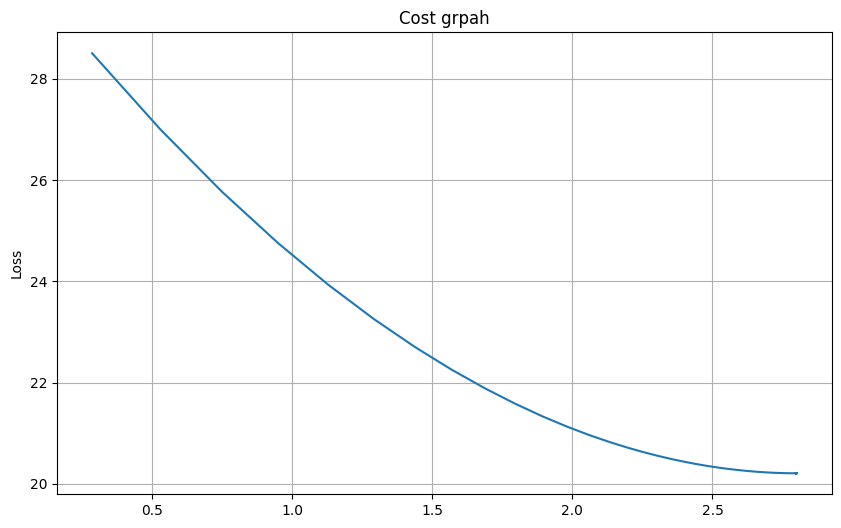

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot([w[0].item() for w in w_values], loss_values)
plt.ylabel('Loss')
plt.title('Cost grpah')
plt.grid(True)
plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [94]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [95]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [96]:
next(iter(data_iter))

[tensor([[-0.2320,  0.6193],
         [ 0.0614,  1.3811],
         [ 0.4485,  1.0279],
         [ 0.0795,  0.6770],
         [ 1.1667,  2.1897],
         [-0.7540, -0.8920],
         [ 0.1381,  0.0049],
         [-0.3874,  0.5474],
         [-0.8584, -1.2244],
         [-0.5008,  0.5790],
         [ 0.8177, -0.6539],
         [-0.5005, -1.4133],
         [ 1.1092,  0.0058],
         [ 1.4060,  1.8332],
         [-0.6021,  0.2396],
         [ 0.1845, -0.8019],
         [ 2.3631,  1.0377],
         [ 1.6242,  1.1970],
         [-1.1155, -0.7414],
         [ 0.3018, -2.0886]]),
 tensor([[ 3.8718],
         [ 3.6153],
         [ 5.3133],
         [ 4.7141],
         [ 5.7049],
         [ 4.5667],
         [ 5.9116],
         [ 3.5024],
         [ 4.7609],
         [ 3.1275],
         [ 8.9413],
         [ 6.1214],
         [ 8.8278],
         [ 6.9770],
         [ 3.3500],
         [ 7.2564],
         [11.0385],
         [ 8.5767],
         [ 3.2778],
         [ 9.5264]])]

In [114]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) ###채워넣기

In [115]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [116]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [117]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.01) ###api function으로 직접 설정

In [118]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) ###채워넣기
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.722530
epoch 2, loss 0.012711
epoch 3, loss 0.000318


In [119]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0062, -0.0050])
error in estimating b: tensor([0.0126])
